# Simulating loacl field potentials (LFP) from correlated spike trains

This notebook will first simulate correlated spike trains as doubly stochastic processes (Brette, 2009; homogeneous pool). Next, local field potentials (LFP) will be simulated from the generated spike trains. Critically, this notebook will characterize relationship between the timescale of the stochastic process used to generate the spike trains and the timescale of the resulting LFP.

This notebook will answer the following questions:
	1. What is the relationship between the timescale of the stochastic process and the timescale of the lfp (Prediction: positive linear corr)
	2. How does population size affect the relationships characterized in 1



#### import

In [2]:
import sys
sys.path.append('../../sim_field')
from os.path import join as pjoin
from funcs import sim_lfp_pool
from funcs import sim_homogeneous_pool
from plots import plot_coincidences
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.spectral import plot_power_spectra
from fooof import FOOOF
from utils import comp_tau_acorr, comp_tau_fooof

#### setting

In [3]:
N_DT_CC = 20000 # number of time bins for cross correlation
DT = 0.1 # time increment in ms
N_NEURONS = 5 # number of neurons

N_SECONDS = 2000
FS = 1000
ALPHA = 300. # I don't know why ALPHA needs to be this high for the functions to work
TAU_C = 1.0E-2
CHUNK_SIZE = 5
FIRING_RATE = 20

## Simulate correlated spiking
simulate correlated spike trains as doubly stochastic processes (Brette, 2009; homogeneous pool)

In [4]:
spikes, rand_process = sim_homogeneous_pool(mu=FIRING_RATE, fs=FS, n_seconds=N_SECONDS, \
                         variance = 300, tau_c=TAU_C)

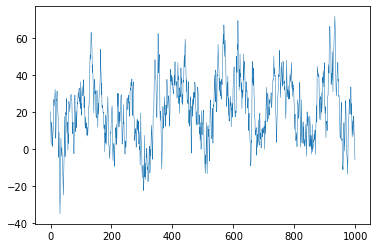

In [5]:
# Plot random process
plt.plot(rand_process[:1000], linewidth=0.5)

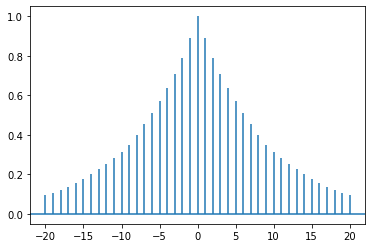

In [6]:
# Plot rate autocorr
rand_process_mean_removed = signal.detrend(rand_process, type='constant')
plt.acorr(rand_process_mean_removed[:5000], maxlags = 20);

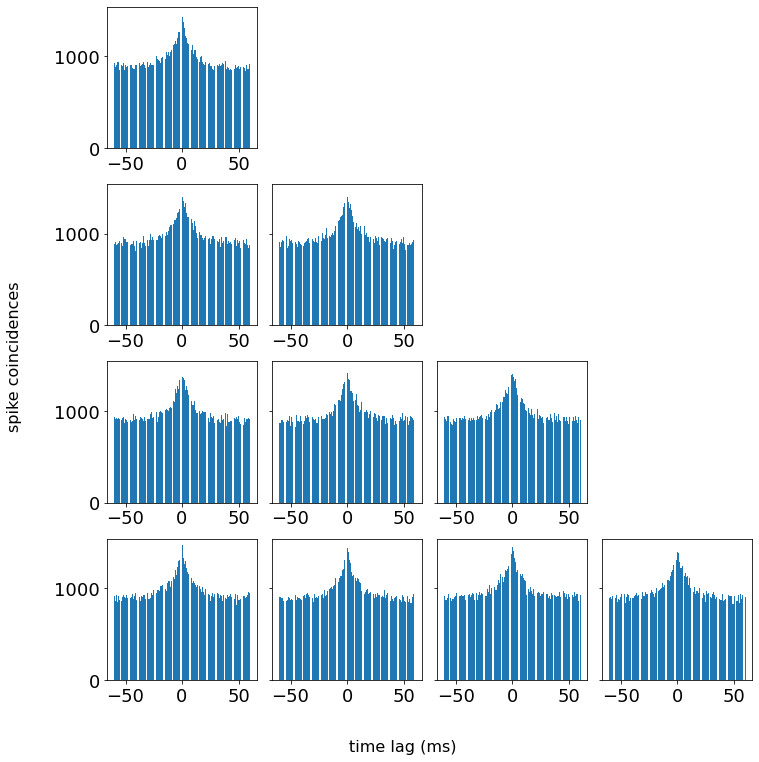

In [7]:
# Plot coincidences
plot_coincidences(spikes, maxlags = int(TAU_C * FS * 2) * 3);

## Simulate LFP
simulate LFP from correlated spike train (Gao, 2017)

In [8]:
lfp, _, _ = sim_lfp_pool(n_neurons = 100)

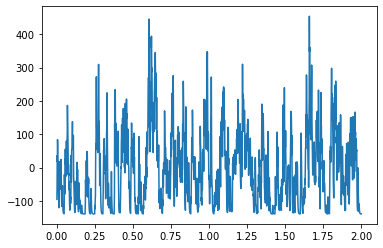

In [9]:
# Plot lfp
t = np.linspace(0,2,2000)
plt.plot(t[:2000], lfp[:2000])

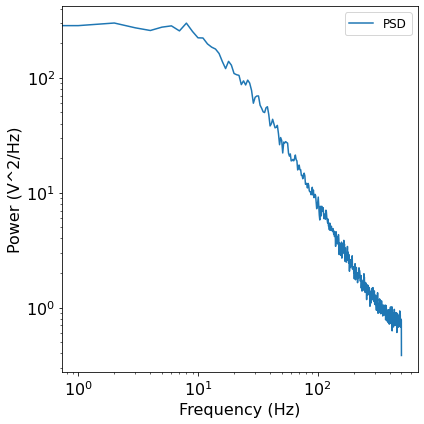

In [10]:
# Plot spectrum
freq, psd = compute_spectrum(lfp, FS, method='welch', avg_type='median',
                                nperseg=FS, noverlap=int(FS/2))
plot_power_spectra([freq], [psd],['PSD'])

## Characterize timescales
Characterize the relationship between the timescale of the stochastic process and the timescale of the lfp

In [11]:
# calculate timescale of lfp using autocorrelation method
tau_acorr = comp_tau_acorr(lfp, fs=FS, maxlag=500)

# calculate timescale of lfp using spectral parameterization method
tau_fooof, _ = comp_tau_fooof(lfp, FS)

# print results
print("timescale of random process: %0.3f ms" %(TAU_C*1000))
print("timescale computed via autocorrelation: %0.3f ms" %(tau_acorr*1000))
print("timescale computed via SpecParam: %0.3f ms" %(tau_fooof*1000))

timescale of random process: 10.000 ms
timescale computed via autocorrelation: 10.045 ms
timescale computed via SpecParam: 10.564 ms


In [12]:
tau_c_permutations = np.linspace(0.01,0.08,8)
iterations = 5
N_SECONDS = 10
# exp_array shape(n_neuron, tau_c, iteration)
lfps = []
rand_processes = []
psd_lfps = []
psd_rand_processes = []
tau_c_lfp = np.zeros((len(tau_c_permutations), iterations))
tau_c_rand_proc = np.zeros((len(tau_c_permutations), iterations))
# pearson r and slope len(n_neuron)
# pearson_r = np.zeros(len(n_neurons_permutations))
# for each tau_c
for j, tau_c in enumerate(tau_c_permutations):
    lfps.append([])
    rand_processes.append([])
    psd_lfps.append([])
    psd_rand_processes.append([])
    # for each iteration
    for iter in range(iterations):
        print(j,iter)
        # calculate and append exp
        lfp, _, rand_process = sim_lfp_pool (n_seconds=N_SECONDS, n_neurons=100, tau_c=tau_c)
        lfps[j].append(lfp)
        rand_processes[j].append(rand_process)
        freq, psd_lfp = compute_spectrum(lfps[j][iter], FS, method='welch', avg_type='median',
                                        nperseg=FS, noverlap=int(FS/2))
        freq, psd_rand_process = compute_spectrum(rand_processes[j][iter], FS, method='welch', avg_type='median',
                                        nperseg=FS, noverlap=int(FS/2))
        psd_lfps[j].append(psd_lfp)
        psd_rand_processes[j].append(psd_rand_process)
        print('comp stoch')
        tau_c_rand_proc[j,iter], _ = comp_tau_fooof(rand_process, FS)# in ms
        print('comp lfp')
        tau_c_lfp[j,iter], _ = comp_tau_fooof(lfp, FS)# in ms
# plot points & calculate and append pearson r and slope
# save numpy if takes too long

0 0
comp stoch
comp lfp
0 1
comp stoch
comp lfp
0 2
comp stoch
comp lfp
0 3
comp stoch
comp lfp
0 4
comp stoch
comp lfp
1 0
comp stoch
comp lfp
1 1
comp stoch
comp lfp
1 2
comp stoch
comp lfp
1 3
comp stoch
comp lfp
1 4
comp stoch
comp lfp
2 0
comp stoch
comp lfp
2 1
comp stoch
comp lfp
2 2
comp stoch
comp lfp
2 3
comp stoch
comp lfp
2 4
comp stoch
comp lfp
3 0
comp stoch
comp lfp
3 1
comp stoch
comp lfp
3 2
comp stoch
comp lfp
3 3
comp stoch
comp lfp
3 4
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


4 0
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


4 1
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


4 2
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


4 3
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


4 4
comp stoch
comp lfp
5 0
comp stoch
comp lfp
5 1
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


5 2
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


5 3
comp stoch
comp lfp
5 4
comp stoch
comp lfp
6 0
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


6 1
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


6 2
comp stoch


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


6 3
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


6 4
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


7 0
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


7 1
comp stoch


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


7 2
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


7 3
comp stoch


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


7 4
comp stoch
comp lfp


../../sim_field/utils.py:35: RuntimeWarning: invalid value encountered in double_scalars
  knee_hz = knee**(1./exponent)


Text(0.5, 1.0, '20ms lfp')

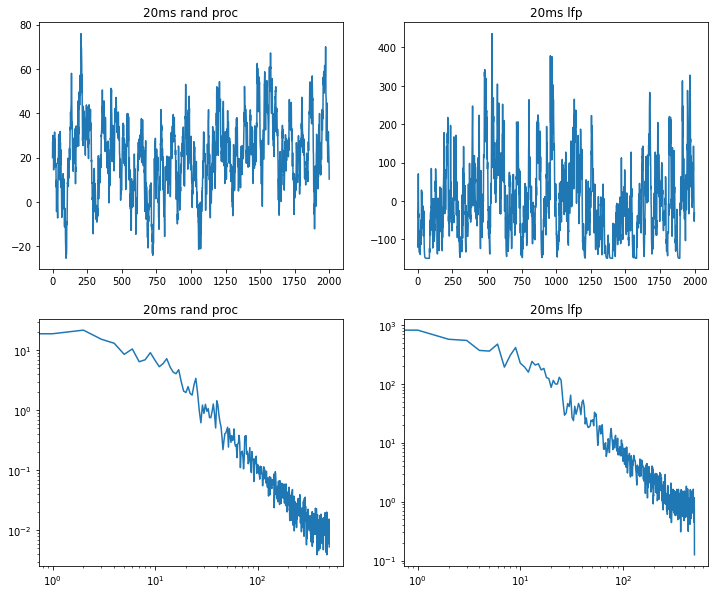

In [25]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(rand_processes[1][0][:2000])
plt.title('20ms rand proc')
plt.subplot(2, 2, 2)
plt.plot(lfps[1][0][:2000])
plt.title('20ms lfp')
plt.subplot(2, 2, 3)
plt.loglog(freq, psd_rand_processes[1][0])
plt.title('20ms rand proc')
plt.subplot(2, 2, 4)
plt.loglog(freq, psd_lfps[1][0])
plt.title('20ms lfp')

Text(0.5, 1.0, '40ms lfp')

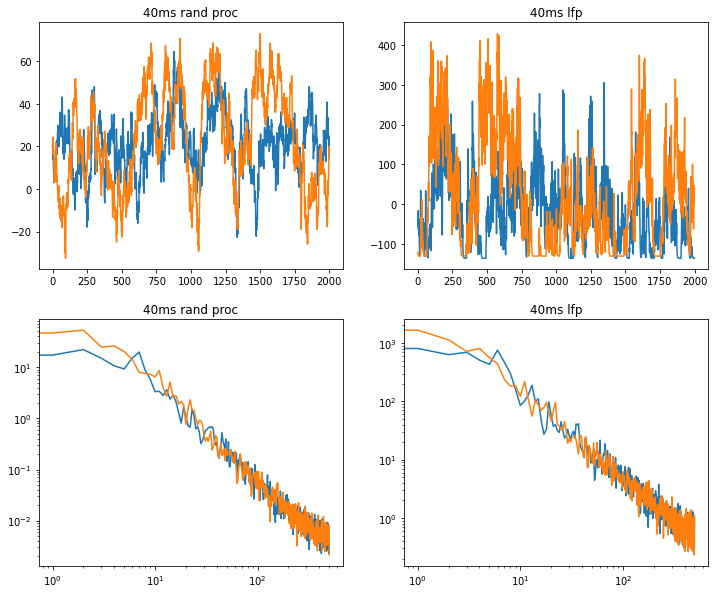

In [26]:
# plot lfp when it breaks
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(rand_processes[3][3][:2000])
plt.plot(rand_processes[3][4][:2000])
plt.title('40ms rand proc')
plt.subplot(2, 2, 2)
plt.plot(lfps[3][3][:2000])
plt.plot(lfps[3][4][:2000])
plt.title('40ms lfp')
plt.subplot(2, 2, 3)
plt.loglog(freq, psd_rand_processes[3][3])
plt.loglog(freq, psd_rand_processes[3][4])
plt.title('40ms rand proc')
plt.subplot(2, 2, 4)
plt.loglog(freq, psd_lfps[3][3])
plt.loglog(freq, psd_lfps[3][4])
plt.title('40ms lfp')

Text(0.5, 1.0, '50ms lfp')

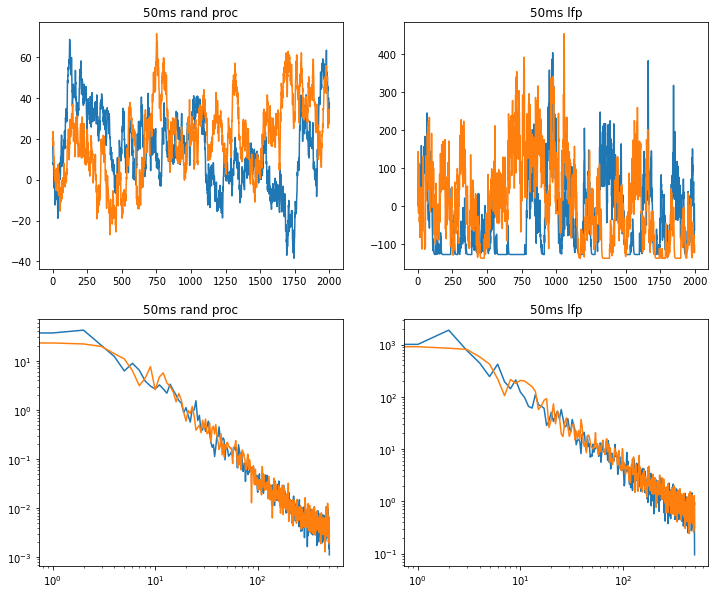

In [27]:
# plot lfp when it breaks
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(rand_processes[4][3][:2000])
plt.plot(rand_processes[4][4][:2000])
plt.title('50ms rand proc')
plt.subplot(2, 2, 2)
plt.plot(lfps[4][3][:2000])
plt.plot(lfps[4][4][:2000])
plt.title('50ms lfp')
plt.subplot(2, 2, 3)
plt.loglog(freq, psd_rand_processes[4][3])
plt.loglog(freq, psd_rand_processes[4][4])
plt.title('50ms rand proc')
plt.subplot(2, 2, 4)
plt.loglog(freq, psd_lfps[4][3])
plt.loglog(freq, psd_lfps[4][4])
plt.title('50ms lfp')

Text(0.5, 1.0, '60ms lfp')

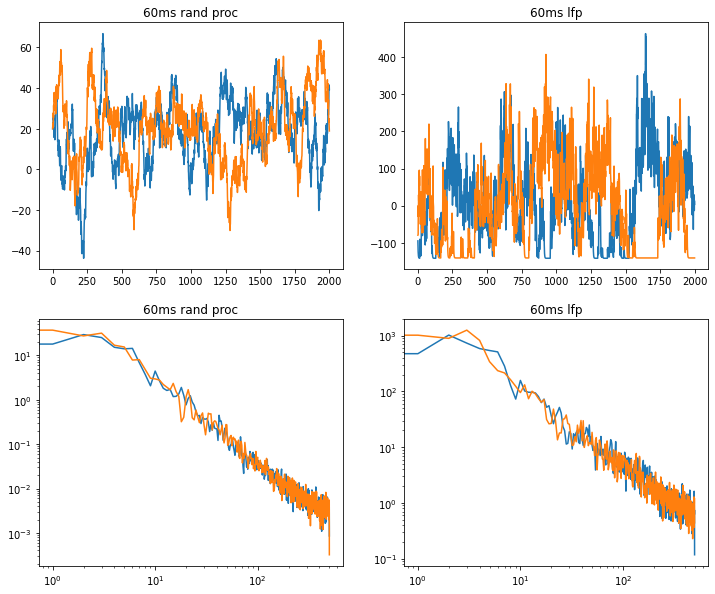

In [28]:
# plot lfp when it breaks
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(rand_processes[5][2][:2000])
plt.plot(rand_processes[5][3][:2000])
plt.title('60ms rand proc')
plt.subplot(2, 2, 2)
plt.plot(lfps[5][2][:2000])
plt.plot(lfps[5][3][:2000])
plt.title('60ms lfp')
plt.subplot(2, 2, 3)
plt.loglog(freq, psd_rand_processes[5][2])
plt.loglog(freq, psd_rand_processes[5][3])
plt.title('60ms rand proc')
plt.subplot(2, 2, 4)
plt.loglog(freq, psd_lfps[5][2])
plt.loglog(freq, psd_lfps[5][3])
plt.title('60ms lfp')

Text(0.5, 1.0, '70ms lfp')

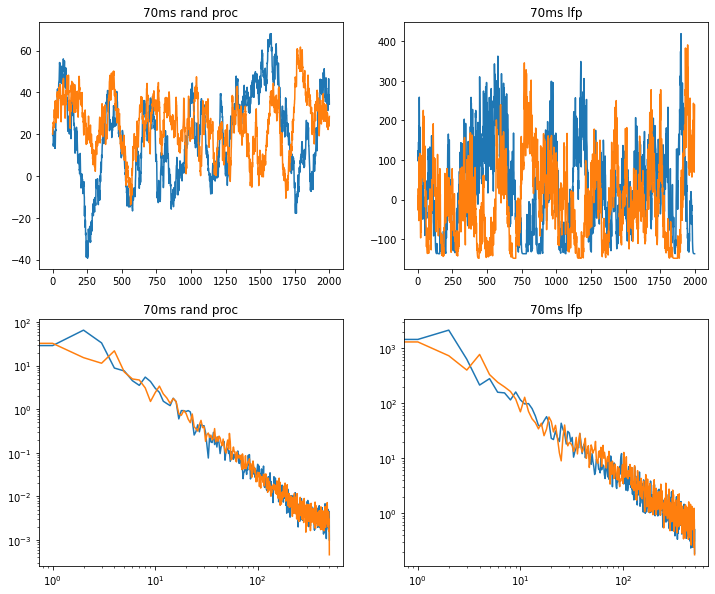

In [29]:
# plot lfp when it breaks
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(rand_processes[6][2][:2000])
plt.plot(rand_processes[6][3][:2000])
plt.title('70ms rand proc')
plt.subplot(2, 2, 2)
plt.plot(lfps[6][2][:2000])
plt.plot(lfps[6][3][:2000])
plt.title('70ms lfp')
plt.subplot(2, 2, 3)
plt.loglog(freq, psd_rand_processes[6][2])
plt.loglog(freq, psd_rand_processes[6][3])
plt.title('70ms rand proc')
plt.subplot(2, 2, 4)
plt.loglog(freq, psd_lfps[6][2])
plt.loglog(freq, psd_lfps[6][3])
plt.title('70ms lfp')

## Evaluate effect of population size

In [ ]:
n_neurons_permutations = [10]
tau_c_permutations = [1.0E-3,1.0E-2,1.0E-1,1.0,1.0E1] # in s
iterations = 5
N_SECONDS = 10
# exp_array shape(n_neuron, tau_c, iteration)
tau_c_lfp = np.zeros((len(n_neurons_permutations), len(tau_c_permutations), iterations))
tau_c_rand_proc = np.zeros((len(n_neurons_permutations), len(tau_c_permutations), iterations))
# pearson r and slope len(n_neuron)
pearson_r = np.zeros(len(n_neurons_permutations))
pearson_slope = np.zeros(len(n_neurons_permutations))
# for each n_neuron
for i, n_neuron in enumerate(n_neurons_permutations):
    # for each tau_c
    for j, tau_c in enumerate(tau_c_permutations):
        # for each iteration
        for iter in range(iterations):
            print(i,j,iter)
            # calculate and append exp
            lfp, _, rand_process = sim_lfp_pool (n_seconds=N_SECONDS, n_neurons=n_neuron, tau_c=tau_c)
            tau_c_rand_proc[i,j,iter], _ = comp_tau_fooof(rand_process, FS)# in ms
            tau_c_lfp[i,j,iter], _ = comp_tau_fooof(lfp, FS)# in ms
    # plot points & calculate and append pearson r and slope
    # save numpy if takes too long


In [9]:
freq, spectrum = compute_spectrum(lfp, FS)
fm = fooof()
fm.fit(freq, spectrum)

NameError: name 'fooof' is not defined

In [5]:
comp_tau_fooof?

Signature: comp_tau_fooof(signal, fs, peak_width_limits=[2, 20], f_range=[2, 200])
Docstring:
Parameters
----------
signal : float
    signal / data for which to compute autocorreltation.
fs : float
    sampling freqeuncy.
peak_width_limits : float, optional
    FOOOF setting - peak width limits. The default is [2, 20].
f_range : float, optional
    frequency range over which to fit the power spectrum. The default is 
    [2,200].

Returns
-------
tau_c :  float
    timescale of signal.
ap_params : list
    offset, exponent, k_param
File:      ~/PSR/visual_encoding/sim_field/utils.py
Type:      function
